# Основные осведения о датасете

In [1]:
from PIL import Image, ImageFile
import collections
import numpy as np
import os
import random
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm as tqdm
import seaborn as sns
from utils_fucntions import*

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
IMAGE_SIZE = (512, 512)

In [3]:
train_df = pd.read_csv("D:\\project\\train.csv")
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [4]:
with open('D:/project/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)

In [5]:
label_desc

{'categories': [{'id': 0,
   'name': 'shirt, blouse',
   'supercategory': 'upperbody',
   'level': 2},
  {'id': 1,
   'name': 'top, t-shirt, sweatshirt',
   'supercategory': 'upperbody',
   'level': 2},
  {'id': 2, 'name': 'sweater', 'supercategory': 'upperbody', 'level': 2},
  {'id': 3, 'name': 'cardigan', 'supercategory': 'upperbody', 'level': 2},
  {'id': 4, 'name': 'jacket', 'supercategory': 'upperbody', 'level': 2},
  {'id': 5, 'name': 'vest', 'supercategory': 'upperbody', 'level': 2},
  {'id': 6, 'name': 'pants', 'supercategory': 'lowerbody', 'level': 2},
  {'id': 7, 'name': 'shorts', 'supercategory': 'lowerbody', 'level': 2},
  {'id': 8, 'name': 'skirt', 'supercategory': 'lowerbody', 'level': 2},
  {'id': 9, 'name': 'coat', 'supercategory': 'wholebody', 'level': 2},
  {'id': 10, 'name': 'dress', 'supercategory': 'wholebody', 'level': 2},
  {'id': 11, 'name': 'jumpsuit', 'supercategory': 'wholebody', 'level': 2},
  {'id': 12, 'name': 'cape', 'supercategory': 'wholebody', 'level':

In [6]:
num_classes = len(label_desc['categories'])
num_attributes = len(label_desc['attributes'])
print(f'Total # of classes: {num_classes}')
print(f'Total # of attributes: {num_attributes}')

Total # of classes: 46
Total # of attributes: 294


## Категории

In [10]:
categories_df = pd.DataFrame(label_desc.get('categories'))
attributes_df = pd.DataFrame(label_desc['attributes'])
categories_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


- рубашка, 
- блузка; 
- топ, футболка, 
- толстовка; 
- свитер;
- кардиган; 
- пиджак; 
- жилет; 
- брюки; 
- шорты;
-  юбка;
-  пальто;
-  платье;
-  комбинезон;
-  плащ;
-  очки;
-  шляпа;
-  повязка на голову, головной убор, аксессуар для волос;
-  галстук; перчатки;
-  часы;
-  ремень;
-  грелка для ног;
-  колготки, чулки;
-  носок;
-  обувь; 
- сумка, кошелек;
-  шарф;
-  зонт; 
- капюшон; 
- воротник; 
- лацкан; 
- погон; 
- рукав; 
- карман; 
- вырез; 
- пряжка; 
- молния; 
- аппликация; 
- бусина; 
- бант; 
- цветок;
-  бахрома; 
- лента;
-  заклепка;
-  оборка;
-  блестка;
-  кисточка;

## Атрибуты

In [16]:
attributes_df

,id,name,supercategory,level
0,0,classic (t-shirt),nickname,1
1,1,polo (shirt),nickname,1
2,2,undershirt,nickname,1
3,3,henley (shirt),nickname,1
4,4,ringer (t-shirt),nickname,1
...,...,...,...,...
289,336,peacock,animal,2
290,337,zebra,animal,2
291,338,giraffe,animal,2
292,339,toile de jouy,textile pattern,1


## Распределение классов

In [17]:
train_df['CategoryId'] = train_df.ClassId.apply(lambda x: str(x).split("_")[0])

C:\Users\Kirill_Sergeev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


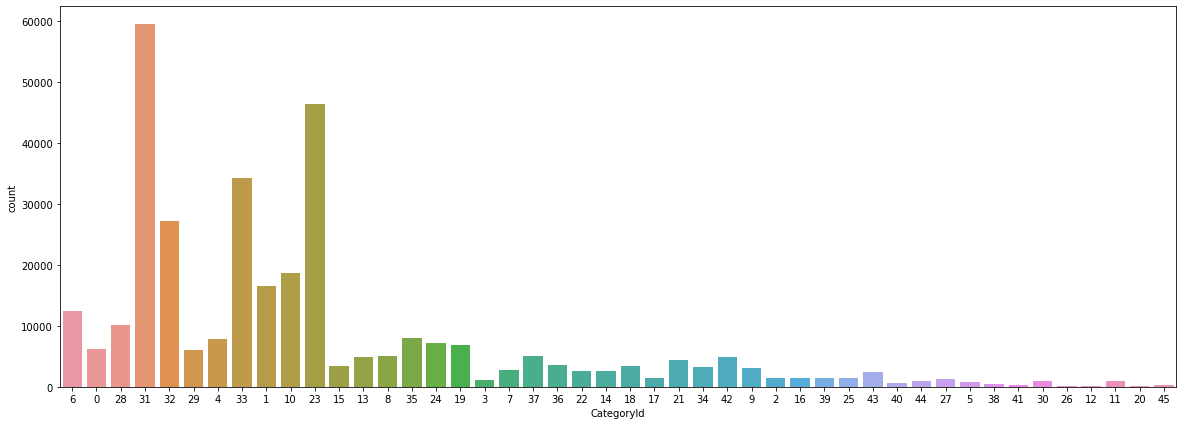

In [18]:
plt.figure(figsize=(20, 7))
sns.countplot(train_df['CategoryId']);

## Визуализация масок

In [19]:
def visualise_masks(image_name, real_df, predicted_df=None, r_p="D:\\project\\train", im_class=None):
    # get image
    img_path = os.path.join(r_p, image_name)
    img = cv2.imread(img_path+'.jpg')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMAGE_SIZE)
    
    # get original mask
    if im_class is not None:
        original_raws = real_df[(real_df['ImageId'] == image_name) & (real_df['ClassId'] == im_class)]
    else:
        original_raws = real_df[real_df['ImageId'] == image_name]
                
    o_h, o_w = int(original_raws['Height'].mean()), int(original_raws['Width'].mean())
    
    o_mask = np.zeros(IMAGE_SIZE)        
        
    for annotation in original_raws['EncodedPixels']:
        o_mask += cv2.resize(rle_decode(annotation, (o_h, o_w)), IMAGE_SIZE)
        
    o_mask = (o_mask > 0.5).astype(np.uint8)
    
    if predicted_df is not None:
        # get predicted mask
        if im_class is not None:
            predicted_raws = predicted_df[(predicted_df['ImageId'] == image_name) & (predicted_df['ClassId'] == im_class)]
        else:
            predicted_raws = predicted_df[predicted_df['ImageId'] == image_name]
                
        p_mask = np.zeros(IMAGE_SIZE)
        
        for annotation in predicted_raws['EncodedPixels']:
            p_mask += rle_decode(annotation, IMAGE_SIZE)
        
        p_mask = (p_mask > 0.5).astype(np.uint8)
    
    fig=plt.figure(figsize=(20, 20))
    fig.add_subplot(1, 3, 1)
    plt.title('image')
    plt.imshow(img)
    fig.add_subplot(1, 3, 2)
    plt.title('original_mask')
    plt.imshow(o_mask)
    
    if predicted_df is not None:
        fig.add_subplot(1, 3, 3)
        plt.title('predicted_mask')
        plt.imshow(p_mask)
        plt.show()

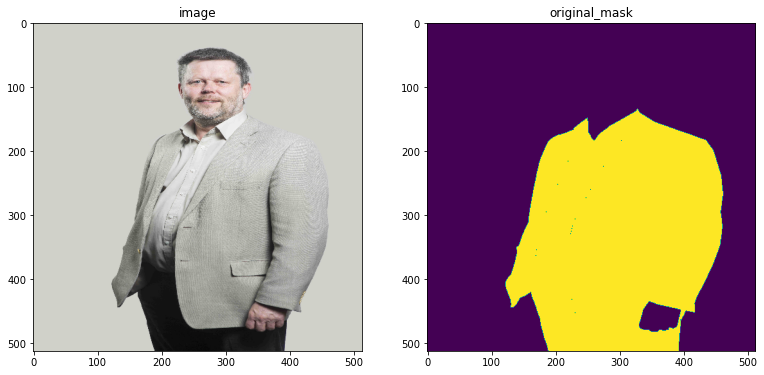

In [20]:
visualise_masks('00000663ed1ff0c4e0132b9b9ac53f6e', train_df,r_p =  "D:\\project\\train")

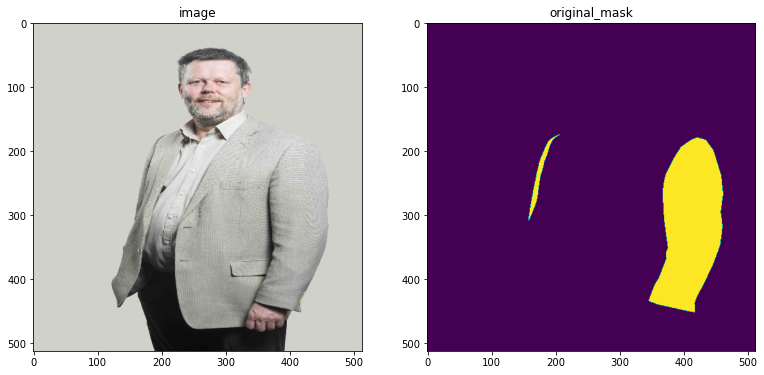

In [21]:
visualise_masks('00000663ed1ff0c4e0132b9b9ac53f6e', train_df,r_p =  "D:\\project\\train" , im_class=31)